# Introduction to Scikit-Learn

G. Richards, 2016 (Drawn in large part from https://github.com/jakevdp/ESAC-stats-2014/blob/master/notebooks/03.1-Scikit-Learn-Intro.ipynb)

Today we will cover the basics of [Scikit-Learn](http://scikit-learn.org), a popular package containing a collection of tools for machine learning written in Python. 

For Scikit-Learn's own introduction, see [http://scikit-learn.org/stable/tutorial/basic/tutorial.html#](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#).

In general, we are interested in taking a set of $n$ samples of data and then predicting properties of unknown data.
In the simplest case the data will be one dimensional, but generally we will be dealig with multi-dimensional data.

As we saw in the first lecture, we can break machine learning into a few distinct categories.  Common to all of these is the concept of **training set** and **test sets**, which is just like they sound: training data will be used to make predictions about the test data.  

The categories of maching learning are 
* [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), where our training set has "labels".  The 
[Scikit-Learn tools for supervised learning](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) can further be broken into two subcategories:
    * [classification](https://en.wikipedia.org/wiki/Statistical_classification): where the data can be separated into two or more "classes" and we can use the labels from the training data to predict the labels for the test data.
    * [regression](https://en.wikipedia.org/wiki/Regression_analysis): where instead of having training data with discrete labels, the "truth" is a continuous property and we are trying to predict the values of that property for the test data.
* [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning), where our training set does not have labels, yet we would like to empirically determine something about the data.  The [Scikit-Learn tools for unsupervised learning](http://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning) include those that can help determine if the data can be represented as belonging to distinct groups ([clustering](https://en.wikipedia.org/wiki/Cluster_analysis)), or if we can determine the distribution of the data within the parameter space ([density estimation](https://en.wikipedia.org/wiki/Density_estimation)),
or if we can better visualize the data (and hope to learn something in so doing) by projecting a high-dimensional space down to 2-3 dimensions ([dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction)).

## About Scikit-Learn

In order to learn about how to use Scikit-Learn to do machine learning/data mining we'll start by taking a look at two very simple machine learning tasks.

The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. We wish to determine a classification algorithm that can be used to draw a dividing boundary
between the two clusters of points:

/home/akumasade/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


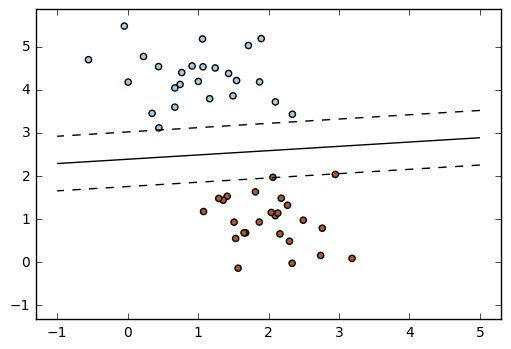

In [1]:
# start the inline backend for plotting
%matplotlib inline

%run code/sklearn_ex1.py

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have "learned" a model which can *generalize* to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now *predict* whether it's a blue or a red point.

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

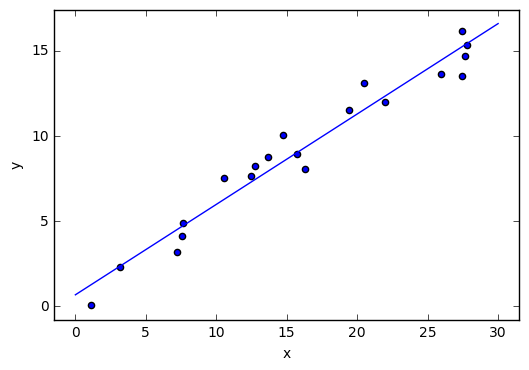

In [2]:
%run code/sklearn_ex2.py

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been *learned* from the training
data and can be used to predict the result of test data: we might be given an $x$-value, and the model would
allow us to predict the $y$ value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

## Representation of Data in Scikit-learn

In order to use Scikit-Learn, we need to understand the input and output of its algorithms.

Most machine learning algorithms implemented in Scikit-Learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by Scikit-Learn.
The data consists of measurements of three different species of irises, which we picture here:

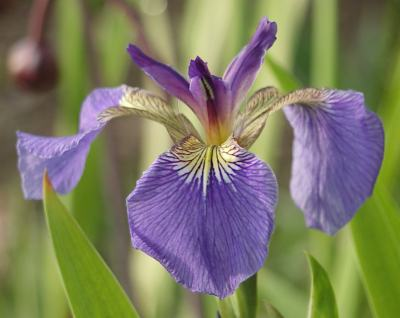

Iris Setosa



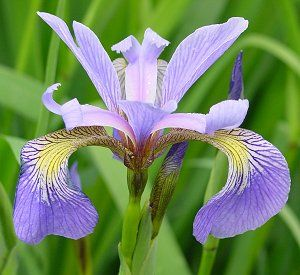

Iris Versicolor



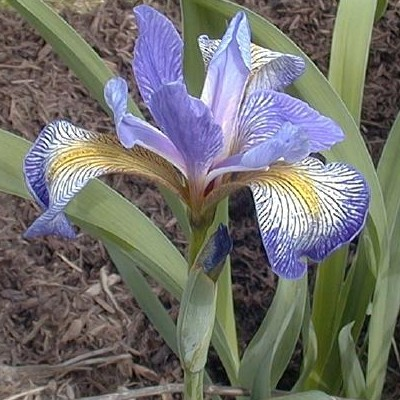

Iris Virginica


In [3]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features/attributes in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

Scikit-learn refers to the "labels" as "targets".  So, every time you see "target", just think "label" and it will make more sense.  
- The target classes are:
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``Scikit-Learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [4]:
# Execute this cell
from sklearn.datasets import load_iris
iris = load_iris()

`iris` is a dictionary, so we can look at the "keys" of the dictionary as follows:

In [5]:
print iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


* `target_names` were defined above
* `data` is the `[n_samples, n_features]` data array
* `target` is the list of labels for all of the entries in `data`
* `DESCR` is a README file with all of the information about the data set
* `feature_names` were defined above

In [6]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

If you are curious, the data come from measurements made in Quebec by botanist Dr. Edgar Anderson and first used for Sir Ronald Fisher's 1936 [classification paper](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf), see [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set).  (I'm beginning to feel like it is time for me to make a donation to wikipedia again!)

We can query the database to determine the shape of the data and find that there are 150 objects with 4 measurements each:

In [7]:
print iris.data.shape 
n_samples, n_features = iris.data.shape
print n_samples, n_features

(150, 4)
150 4


Now let's look at both the first entry in `data` and the full N$\times$M data array.  The first entry shows the values of the 4 features for the first object.

Note the struture of the full data array.   It is an `n_samples` array of arrays with `n_features`.  Scikit-learn is very picky about this exact format and it isn't always what you woud generate naturally (particulary in the case where we have only one feature).  More on this later.

In [8]:
print iris.data[0]
print iris.data

[ 5.1  3.5  1.4  0.2]
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2 

We can also inpect the shape of the target (labels) array, which is an `n_samples`-D array, print the values of those labels, and also learn how those numerical values relate to the names of the iris species:

In [9]:
# The shape of the target (labels) array is just an n_samples X 1 array
print iris.target.shape

# Here we see that the labels are given numerical values
print iris.target

# Use target_names to translate those numerical values to names
print iris.target_names
print iris.target_names[0]

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
setosa


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot.

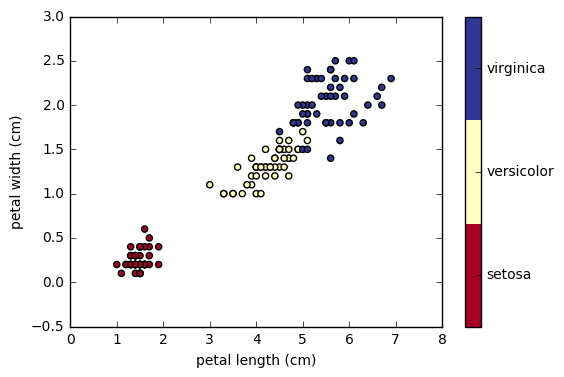

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

### Quick Exercise:

Change `x_index` and `y_index` in the above script
and find a combination of two parameters
which maximally separate the three classes.

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Other Available Data

comes in three flavors:
- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.

In [11]:
from sklearn import datasets

In [12]:
# Type datasets.fetch_<TAB> in IPython to see all possibilities
datasets.laod_

AttributeError: 'module' object has no attribute 'laod_'

A similar interface to [datasets](http://www.astroml.org/examples/datasets/#) is available in ``astroML``:

In [ ]:
from astroML import datasets

In [ ]:
# Use tab completion to explore datasets
datasets.fetch_

## Basic Principles of Machine Learning

Now we can dive into the basic principles of machine learning, and how to
utilize them via the Scikit-Learn.

After briefly introducing scikit-learn's *Estimator* object, we'll get an introduction to **supervised learning**, including *classification* and *regression* problems, and **unsupervised learning**, including *dimensionality reduction* and *clustering* problems.

### The Scikit-Learn Estimator Object

Every algorithm in scikit-learn generates an ''Estimator'' object. 

All the **parameters** of an estimator can be set when it is instantiated, and have suitable default values.  

Let's take a look at all of the parameters, attributes and methods in the [LinearRegression module](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialize a LinearRegression estimator object, call it `model`
model = LinearRegression(normalize=True)

# Check an individual parameters
print(model.normalize)

# Check all of the parameters
print(model)

With our model initialized, we are ready to input some data.  So let's make a simply test case.

In [ ]:
#creating a training set
x_train = np.arange(10)
y_train = 2 * x_train + 1
print x_train
print y_train

In [ ]:
plt.plot(x_train, y_train, 'o');

Now what we'd like to do is to `fit` that data to determine the model parameters that we would need to `predict` the $y$ values of any new measurement of $x$.  

The general code syntax for this sort of thing might be

```
lsqfit x_train y_train x_test y_out
```

Scikit-Learn breaks this into two steps:
    1. fitting
    2. predicting
    
Where the syntax of the fit looks like:

In [ ]:
# fit the model on our data
model.fit(x_train, y_train)

Did that work for anyone?  No, right?

That's because Scikit-Learn wants the training **features** as a multi-dimensional array.  Even if there is only one dimension, like we have here.  

Their standard syntax is to call this multi-dimensional training array, $X$, (capital $x$) and the training "labels" (which can be continuous) simply $y$.

If your $x$ is 1-D, then we have to turn it into something that looks like it is $N$-D.  All of the following yield the same result.  I personally like the last one since it is (sort of) readable.  It says, take by $x$ array and add another `feature` that is blank.  The `reshape` syntax looks like it used to be widely used, but has now mostly been replaced with the `np.newaxis` syntax.  

The effect of all three is to turn $x$ into a `n_samples` by 1-D *array* rather than an array of `n_samples`.

In [ ]:
# The input data for sklearn must be 2D: (samples == N x features == 1)

# All of these give the same result.  I'll adopt the convention from the last one.
print x_train.reshape(-1,1)
print x_train[:, np.newaxis]
print x_train[:, None]

X = x_train[:, None]
y = y_train
print y

Note that you can produce random $X$s in the correct format with
```
N = 10
X = np.random.random(size=(N, 1))
```

And you can go backwards with
```
X.squeeze()
```

In [ ]:
# Now we can fit the model on our data
model.fit(X, y)

**Estimated Model parameters**

All the estimated parameters are attributes of the estimator object ending with an *underscore*:

In [ ]:
# Let's look at the fit parameters, which are indicated by an underscore at the end
print model.coef_
print model.intercept_

The model found a line with a slope 2 and intercept 1, as we'd expect.

### Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower.

Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

### Classification Example
[K nearest neighbors (kNN)](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem.  First see if you can do a kNN fit on the iris data using the 5 nearest neighbors.

In [ ]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)# Complete

# fit the model
knn.fit(X,y)
# Complete

Now see if you can figure out what kind of iris has a 3cm x 5cm sepal and 4cm x 2cm petal
using the predict method?  Remember to be careful constructing your $X$ array.  This is tricker than before.  We now have multiple features, but we still need those in a `n_samples=1` by `n_feaures=4` array.

In [ ]:

Xtest = np.array([[3, 5, 4, 2]])#should be an array

print Xtest


Once $X$ is properly formatted, go ahead and do the prediction.  

Can you output the *name* rather than the index of the iris type?

In [ ]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict(Xtest)

print result

print iris.target_names[result]# Complete by printing *name* of flower

In some sense the whole point of classification is that there isn't necessarily going to be a black and white "right" answer.  So, we might want to do probabilistic predictions instead.

In [ ]:
knn.predict_proba(Xtest)

We could even visualize the full parameter space so that we could determine the classification by eye.  To make things simpler, we have done this in 2-D rather than 4-D.  Note that it isn't perfect, but does a really good job of classifying at least the red sources.

In [ ]:
%run code/sklearn_ex3.py

### Exercise

Let's do the same, but now using [``sklearn.svm.SVC``](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to predict what type of iris has a 3cm x 5cm sepal and 4cm x 2cm petal?

Note that you don't have to know what it is do use it.

Careful -- our plot above overwrote some things.  So, best to start from scratch and reload the iris data set and redefine the test input.

In [ ]:
from sklearn.svm import SVC
#iris = # Complete
#X, y = # Complete
iris = datasets.load_iris()
X, y = iris.data, iris.target

Xtest = np.array([[3, 5, 4, 2]])# Complete

In [ ]:
model = SVC()# Complete (your model object)
# Fit the model
model.fit(X,y)
# Determine and print the result
result = model.predict(Xtest)

print iris.target_names[result]

### Regression Example

OK, that was a **classification** example, the simplest possible **regression** example is just fitting a line to data:

In [ ]:
# Create some simple data
import numpy as np
np.random.seed(0)
x = np.random.random(size=20)
y = 3 * x + 2 + np.random.randn(20)
X = x[:,None]

# Fit a Linear Model
modelLR = LinearRegression(normalize=True)
modelLR.fit(X,y)


# Plot the data and the model prediction
x_test = np.linspace(0, 1, 100)
X_test = x_test[:,None]
y_testLR = modelLR.predict(X_test)

plt.plot(x, y, 'o')
plt.plot(X_test, y_testLR)

Modify the above code to add a line using the [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) as well.

In [ ]:
# Fit a Random Forest model
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(X,y)


# Plot the data and the model prediction
x_test = np.linspace(0, 1, 100)
X_test = x_test[:,None]
y_testLR = RFR.predict(X_test)

plt.plot(x, y, 'o')
plt.plot(X_test, y_testLR)

## Unsupervised Learning: Dimensionality Reduction and Clustering

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding similarities between the objects in question. In a sense,
you can think of unsupervised learning as *a means of discovering labels from the data itself*.

Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can use unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we'll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:
- given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

### Dimensionality Reduction: PCA

[Principle Component Analysis (PCA)](http://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it.

The process starts in the same way as the other Scikit-Learn examples that we have done:

In [ ]:
X, y = iris.data, iris.target
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)# Complete with 2 components)
# Do the fitting
pca.fit(X,y)

But now we can't do a `predict` step since we don't have training data.  Instead we are going to use the `transform()` method.  But first let's take a look at the [parameters, attributes, and methods for PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).

In [ ]:
#pca doesn't have 'predict' method
X_reduced = pca.transform(X) 
print("Reduced dataset shape:", X_reduced.shape)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')

print("Projection of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, iris.feature_names)))

This projection maximizes the separation of the classes.  We can use this either just for visualization or to actually help define the classes.

### Clustering: K-means

[Clustering](http://scikit-learn.org/stable/modules/clustering.html) groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

Let's look at [`KMeans`](http://scikit-learn.org/stable/modules/clustering.html#k-means).  Note that here the [parameters, attributes, and methods](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) allow for *either* `predict` or `transform`.

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Setting the RNG seed in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='RdYlBu')

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()`: fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` [e.g., `model.fit(X, y)`].  For unsupervised learning applications, this accepts only a single argument, the data `X` [e.g., `model.fit(X)`].
- Available in **supervised estimators**
  + `model.predict()`: given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` [e.g., `model.predict(X_new)`],
    and returns the learned label for each object in the array.
  + `model.predict_proba()`: For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()`: For classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()`: given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()`: some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

## Model Validation

An important piece of machine learning is **model validation**: that is, determining how well your model will generalize from the training data to future unlabeled data. Let's look at an example using the *nearest neighbor classifier*. This is a very simple classifier: it simply stores all training data, and for any unknown quantity, simply returns the label of the closest training point.

With the iris data, it very easily returns the correct prediction for each of the input points:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print (y==y_pred)
print(np.all(y == y_pred)) # To check all at once.

See what happens if we used more than the first nearest neighbor.

A more useful way to look at the results is to view the **confusion matrix**, or the matrix showing the frequency of inputs and outputs:

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

For each class, all 50 training samples are correctly identified. But this **does not mean that our model is perfect!** In particular, such a model generalizes extremely poorly to new data. We can simulate this by splitting our data into a *training set* and a *test set*. Scikit-learn contains some convenient routines to do this, here we will apply [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split):

In [ ]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

This paints a better picture of the true performance of our classifier: apparently there is some confusion between the second and third species, which we might anticipate given what we've seen of the data above.

This is why it's **extremely important** to use a train/test split when evaluating your models.  We'll go into more depth on model evaluation later.

## One Last Example
Sometimes you might want to apply multiple machine learning techniques.  For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Let's take a look at a really cool data set/example.  I used to worry about my handwriting on letter addresses.   No longer!

### Handwritten numbers data set

Another built-in Scikit-Learn data set is the [handwritten digits data set](http://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-data-set).

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
print digits.images.shape
print digits.keys()

Let's plot a few of the images:

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Here the data is simply each pixel value within an 8x8 grid.  For analysis, we don't care about the 2-D nature of the image, we can just treat it as an 8x8=64 dimensional array.  So our data have 1797 samples in 64 dimensions.

Then each of the 1797 *images* has a label.

In [ ]:
print digits.data.shape

# The images themselves
print digits.images[0]

# The data for use in our algorithms
print digits.data[0]

# The labels
print digits.target
print digits.target[0]

### Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in 64 dimensions! Instead we'll use a unsupervised dimensionality reduction technique called [`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap):

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap()# Complete for 2 components (default is n_components = 2)
#X, y = digits.data, digits.targets
data_projected = iso.fit_transform(digits.data)# Do the fit *and* transform at the same time
data_projected.shape # See what the resulting shape is

`Isomap` has turned our 1797x64 dimensional data set into a 1797x2 dimensional data set.  This is much easier to visualize!  Now let's see if that visualization is at all helpful.

In [ ]:
# Plot all of the data points as the in the two projected dimensions.  Color the points by their labels.
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
# Add the color bar
plt.colorbar(label='digit label', ticks=range(10))
# Make it clear which color goes with which label
plt.clim(-0.5, 9.5)

We see here that the digits are fairly well-separated in the parameter space; this tells us that a supervised classification algorithm should perform fairly well. Let's give it a try.

### Supervised Learning: Classification on Digits

The first thing we'll want to do before attempting to classify the digits is to split the digits into a training and testing sample:

In [ ]:
from sklearn.cross_validation import train_test_split
# Complete the line below using 80% of the sample for training
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=2, train_size = 0.8, test_size = 0.2)# Complete)
print(Xtrain.shape, Xtest.shape)

Let's use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which (despite its name) is a classification algorithm:

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Xtrain, ytrain)# Complete)
ypred = clf.predict(Xtest)# Complete
#print(confusion_matrix(ytest, ypred))

We can check our classification accuracy by comparing the true values of the test set to the predictions.  We'll use one of sklearn's built-in [metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

This single number doesn't tell us *where* we've gone wrong: one nice way to do this is to use the *confusion matrix* as we did above.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap='Blues', interpolation='nearest')
plt.ylabel('true')
plt.xlabel('predicted');

So, that's all 32 "0"s were classified as "0" and no non-zero digits were so classified.

41 "1"s were classified correctly, but one each were classified as a "3", "8", and "9".  Moreover, two "4"s and two "8"s were classified as "1s".

And so on.

We can look at some of the outputs along with their predicted labels, making the bad labels red:

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]), transform=ax.transAxes, color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

The interesting thing is that even with this simple logistic regression algorithm, many of the mislabeled cases are ones that we ourselves might get wrong!

There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weaks.

## Flow Chart: How to Choose your Estimator

In the mean time, I remind you of this the [Scikit-Learn algorithm cheat sheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/) which gives a nice summary of which algorithms to choose in various situations.

In [ ]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png")